<a href="https://colab.research.google.com/github/RuwanPradeep0/DeepLearningModels-With-TensorFlow/blob/main/classification_with_Tensoflor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;


In [7]:
data = pd.read_csv("/content/dataset.csv")

In [8]:
data.shape

(205, 3)

In [9]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [16]:
data.loc[data['Sex'] == 'Male' , 'Sex'] = 1
data.loc[data['Sex'] == 'Female' , 'Sex'] = 0

In [17]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [18]:
x = data.drop(['Sex'] , axis = 1)
y = data['Sex']

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x= pd.DataFrame(x_scaled , columns = x.columns)

In [69]:
x.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [67]:
y= y.astype(float)

In [68]:
y.dtype


dtype('float64')

In [70]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


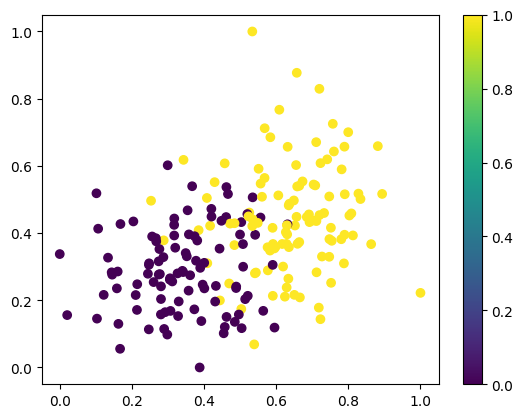

In [71]:
plt.scatter(x['Height'] , x['Weight'] , c=y)
plt.colorbar()
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [73]:
x_train.shape
x_test.shape

(41, 2)

**Model Build**

In [75]:
#create model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64 , activation = 'relu' , input_shape = (2,)),
    tf.keras.layers.Dense(16 , activation = 'relu' ),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
]
)

# Compile model
model.compile(loss = tf.losses.BinaryCrossentropy() ,
              optimizer = tf.optimizers.Adam(lr=0.001),
              metrics = ['accuracy'])

#train model
epoch_number =32
history = model.fit(x_train , y_train , epochs = epoch_number)

Epoch 1/32
6/6 [==============================] - 1s 5ms/step - loss: 0.6989 - accuracy: 0.4573
Epoch 2/32
6/6 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5671
Epoch 3/32
6/6 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.6037
Epoch 4/32
6/6 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.6159
Epoch 5/32
6/6 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.5793
Epoch 6/32
6/6 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5671
Epoch 7/32
6/6 [==============================] - 0s 4ms/step - loss: 0.6691 - accuracy: 0.5671
Epoch 8/32
6/6 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.5793
Epoch 9/32
6/6 [==============================] - 0s 4ms/step - loss: 0.6598 - accuracy: 0.6159
Epoch 10/32
6/6 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.6341
Epoch 11/32
6/6 [======================

In [76]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                192       
                                                                 
 dense_46 (Dense)            (None, 16)                1040      
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Evaluate**

In [77]:
model.evaluate(x_test , y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4628 - accuracy: 0.9024


[0.4628421366214752, 0.9024389982223511]

In [78]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [79]:
y_pred[:5]

array([[0.6692055 ],
       [0.5388646 ],
       [0.4824748 ],
       [0.31381708],
       [0.75493157]], dtype=float32)

In [80]:
y_test[:5]

44     1.0
74     1.0
118    0.0
204    0.0
149    1.0
Name: Sex, dtype: float64

In [81]:
#precission
precission = tf.keras.metrics.Precision()
precission.update_state(y_test , y_pred)
precission.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9047619>

In [82]:
#Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test , y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9047619>

<Axes: >

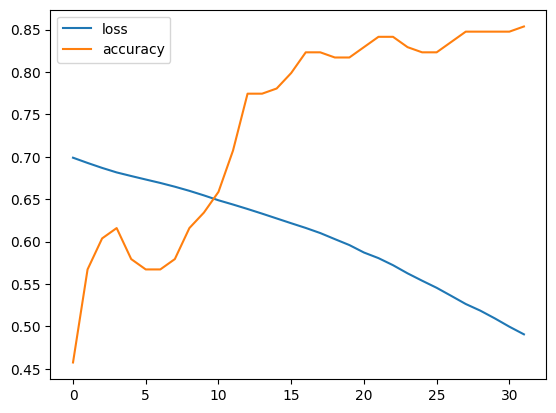

In [83]:
pd.DataFrame(history.history).plot()